# 0.0 Import Bibs

In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors as nb
from sklearn import linear_model as lm
from sklearn import metrics as mt
from sklearn import tree as tr
from sklearn import model_selection as ms
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn import cluster as ct
from sklearn import datasets as ds
from sklearn import ensemble as en
from matplotlib import pyplot as plt
import cv2

import warnings
warnings.filterwarnings("ignore")

# 1.0 Load Datasets

In [2]:
x_train_class = pd.read_csv('../datasets/classification/X_training_class.csv')
y_train_class = pd.read_csv('../datasets/classification/y_training_class.csv')
x_val_class = pd.read_csv('../datasets/classification/X_validation_class.csv')
y_val_class = pd.read_csv('../datasets/classification/y_validation_class.csv')
x_test_class = pd.read_csv('../datasets/classification/X_test_class.csv')
y_test_class = pd.read_csv('../datasets/classification/y_test_class.csv')


# 2.0 Defs

In [3]:
# modularização de métricas
def accuracy (y_test, y_pred):
    acc = mt.accuracy_score(y_test, y_pred)
    return acc

def precision (y_test, y_pred, n):
    prec = mt.precision_score(y_test, y_pred, pos_label = n)
    return prec
 
def recall (y_test, y_pred, n):
    recall = mt.recall_score(y_test, y_pred, pos_label = n)
    return recall

def f1_score (y_test, y_pred):
    f1score = mt.f1_score(y_test, y_pred)
    return f1score
    
def metrics_list(lista_a, metrica_a, lista_b, metrica_b, lista_c, metrica_c, lista_d, metrica_d):
    lista_a.append(metrica_a)
    lista_b.append(metrica_b)
    lista_c.append(metrica_c)
    lista_d.append(metrica_d)
    return lista_a, lista_b, lista_c, lista_d


In [67]:
# modularização de tabelas
def tabela (algoritmo, parametro, n, parametro2, n2, acc1, acc2, acc3, prec1, prec2, prec3,
            recall1, recall2, recall3, f1s1, f1s2, f1s3):
    df = pd.DataFrame({algoritmo:['dataset train', 'dataset validation', 'dataset test'],
                       parametro1:[n, n, n],
                       parametro2: [n2, n2, n2],
                       'Accuracy': [acc1, acc2, acc3],
                       'Precision': [prec1, prec2, prec3],
                       'Recall': [recall1, recall2, recall3],
                       'F1_Score': [f1s1, f1s2, f1s3]})
    return df

In [5]:
# seleção de features
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

x_train_class = x_train_class.loc[:,features]
x_val_class = x_val_class.loc[:,features]
x_test_class = x_test_class.loc[:,features]

# 3.0 Ensaio Machine Learning

## 1) KNN Classifier

### dados de treino

In [8]:
# parametrização
x_train_fts = x_train_class.loc[:, features]
k = np.arange(3, 50, 2)
acc_list = []
prec_list = []
recall_list=[]
f1_list=[]

In [116]:
# definição
knn_model = nb.KNeighborsClassifier(n_neighbors = 13)

#treino
knn_model.fit(x_train_fts, y_train_class)

#predição
ytrain_pred = knn_model.predict(x_train_fts)

/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [117]:
knn_acc_train = accuracy(y_train_class, ytrain_pred)
knn_prec_train = precision(y_train_class, ytrain_pred, 1)
knn_recall_train = recall(y_train_class, ytrain_pred, 1)
knn_f1_train = f1_score(y_train_class, ytrain_pred)

In [9]:
for i in range(len(k)):
    # definição
    knn_model = nb.KNeighborsClassifier(n_neighbors = k[i])
    #treino
    knn_model.fit(x_train_fts, y_train_class)
    #predição
    ytrain_pred = knn_model.predict(x_train_fts)
    #métricas
    knn_acc_train = accuracy(y_train_class, ytrain_pred)
    acc_list.append(knn_acc_train)
    knn_precision_train = precision(y_train_class, ytrain_pred, 1)
    prec_list.append(knn_precision_train)
    knn_recall_train = recall(y_train_class, ytrain_pred, 1)
    recall_list.append(knn_recall_train)
    knn_f1_train = f1_score(y_train_class, ytrain_pred)
    f1_list.append(knn_f1_train)

/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sk

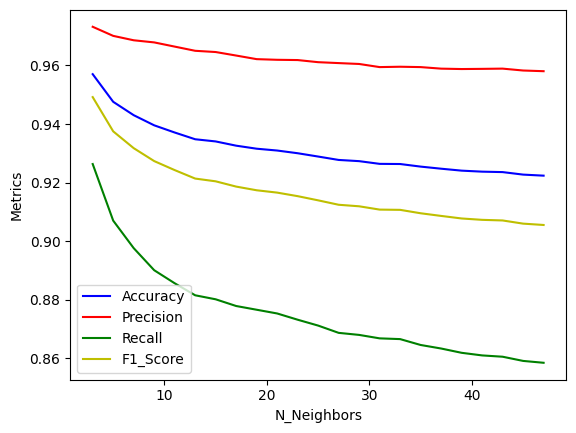

In [10]:
plt.plot(k[:i], acc_list[:i], 'b-', label='Accuracy')
plt.plot(k[:i], prec_list[:i], 'r-', label='Precision')
plt.plot(k[:i], recall_list[:i], 'g-', label='Recall')
plt.plot(k[:i], f1_list[:i], 'y-', label='F1_Score')
plt.xlabel('N_Neighbors')
plt.ylabel('Metrics')
plt.legend()

In [11]:
k_best = f1_list.index(max(f1_list))
k_neighbors = k[k_best]
k_neighbors

3

In [26]:
matriz = mt.confusion_matrix(y_train_class, ytrain_pred)
matriz

array([[39884,  1203],
       [ 4487, 26941]])

In [12]:
knn_modelproba = nb.KNeighborsClassifier(n_neighbors = 3)
#treino
knn_modelproba.fit(x_train_fts, y_train_class)
#predição
ytrain_pred_proba = knn_model.predict_proba(x_train_fts)

fpr, tpr, th = mt.roc_curve(y_train_class, ytrain_pred_proba[:,1])


/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'TPR')

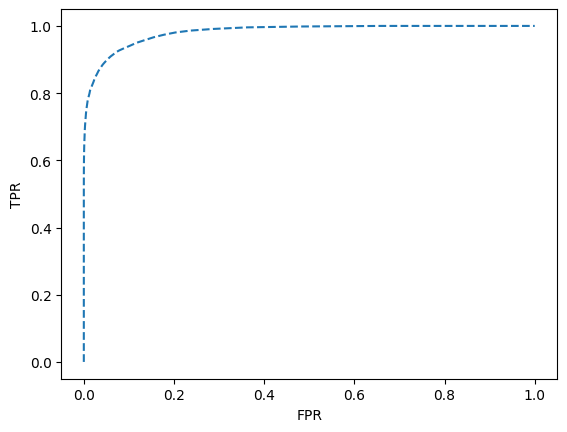

In [13]:
plt.plot(fpr, tpr, '--',label= "Threshold def")
plt.xlabel('FPR')
plt.ylabel('TPR')

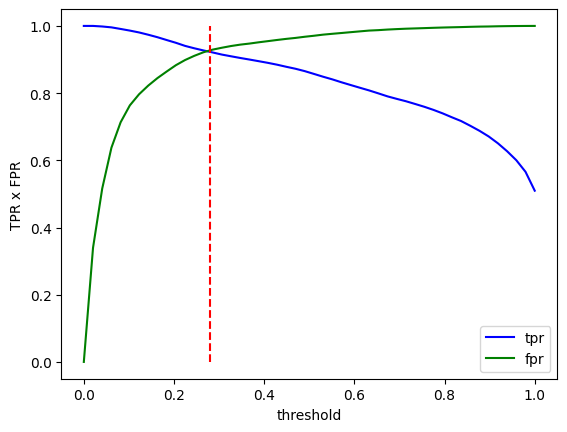

In [22]:
plt.plot(th, tpr, 'b-',label= "tpr")
plt.plot(th, 1-fpr, 'g-',label= "fpr")
plt.xlabel('threshold')
plt.ylabel('TPR x FPR')
plt.vlines(0.28, 0, 1, color='red', linestyle='--')
plt.legend()

In [24]:
ytrain_pred_probateste = ytrain_pred_proba[:,1]
th = 0.28
ytrain_pred_probateste = [1 if i>th else 0 for i in ytrain_pred_probateste]


In [27]:
matriz2 = mt.confusion_matrix(y_train_class, ytrain_pred_probateste)
matriz2

array([[38188,  2899],
       [ 2482, 28946]])

In [79]:
fpr

array([0.00000000e+00, 0.00000000e+00, 9.73543943e-05, 3.16401782e-04,
       6.32803563e-04, 1.04655974e-03, 1.65502470e-03, 2.04444228e-03,
       2.67724584e-03, 3.45608100e-03, 4.08888456e-03, 4.77036532e-03,
       5.59787767e-03, 6.52274442e-03, 7.42327257e-03, 8.29946212e-03,
       9.46771485e-03, 1.08306764e-02, 1.25587169e-02, 1.38486626e-02,
       1.62095067e-02, 1.86190279e-02, 2.10772264e-02, 2.34380704e-02,
       2.59692847e-02, 2.92793341e-02, 3.22729817e-02, 3.57047241e-02,
       3.85523402e-02, 4.18137124e-02, 4.52941320e-02, 4.87502130e-02,
       5.25226957e-02, 5.56867136e-02, 5.98242753e-02, 6.49353810e-02,
       7.05575973e-02, 7.84189646e-02, 8.90792708e-02, 1.01564972e-01,
       1.16971305e-01, 1.35785041e-01, 1.55280259e-01, 1.77598754e-01,
       2.03470684e-01, 2.36498162e-01, 2.86708691e-01, 3.62377394e-01,
       4.83851340e-01, 6.60306180e-01, 1.00000000e+00])

In [80]:
tpr

array([0.        , 0.50960927, 0.56576938, 0.6002291 , 0.62698867,
       0.65059819, 0.6709622 , 0.68779432, 0.70274914, 0.71690849,
       0.72804506, 0.7396589 , 0.75006364, 0.75935472, 0.76772305,
       0.77586865, 0.78293242, 0.79034619, 0.79931908, 0.80803742,
       0.81599211, 0.82407407, 0.8322515 , 0.84096984, 0.84882907,
       0.85722922, 0.8655021 , 0.87253405, 0.8783887 , 0.88462518,
       0.890098  , 0.89506173, 0.89993   , 0.90460736, 0.9096029 ,
       0.91472572, 0.92102584, 0.92703958, 0.93346697, 0.94059437,
       0.94982181, 0.95803106, 0.96639939, 0.97378134, 0.98059056,
       0.9860952 , 0.99099529, 0.99570447, 0.99831361, 1.        ,
       1.        ])

In [81]:
th

array([       inf, 1.        , 0.97959184, 0.95918367, 0.93877551,
       0.91836735, 0.89795918, 0.87755102, 0.85714286, 0.83673469,
       0.81632653, 0.79591837, 0.7755102 , 0.75510204, 0.73469388,
       0.71428571, 0.69387755, 0.67346939, 0.65306122, 0.63265306,
       0.6122449 , 0.59183673, 0.57142857, 0.55102041, 0.53061224,
       0.51020408, 0.48979592, 0.46938776, 0.44897959, 0.42857143,
       0.40816327, 0.3877551 , 0.36734694, 0.34693878, 0.32653061,
       0.30612245, 0.28571429, 0.26530612, 0.24489796, 0.2244898 ,
       0.20408163, 0.18367347, 0.16326531, 0.14285714, 0.12244898,
       0.10204082, 0.08163265, 0.06122449, 0.04081633, 0.02040816,
       0.        ])

In [28]:
knn_modelproba = nb.KNeighborsClassifier(n_neighbors = 3)
#treino
knn_modelproba.fit(x_train_fts, y_train_class)
#predição
ytrain_pred_proba2 = knn_model.predict_proba(x_train_fts)

precision, recall, thr = mt.precision_recall_curve(y_train_class, ytrain_pred_proba2[:,1])

/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'precision')

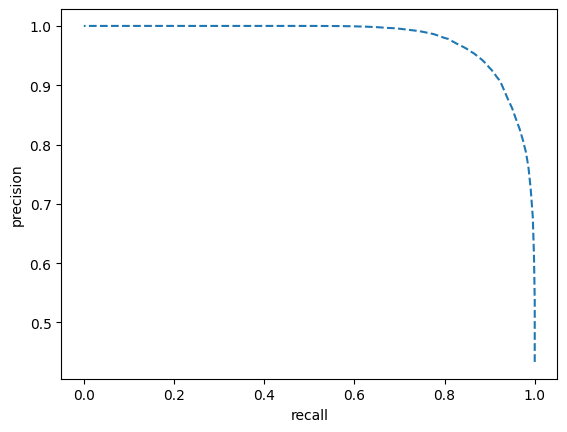

In [29]:
plt.plot(recall, precision, '--',label= "Recall x Precision")
plt.xlabel('recall')
plt.ylabel('precision')

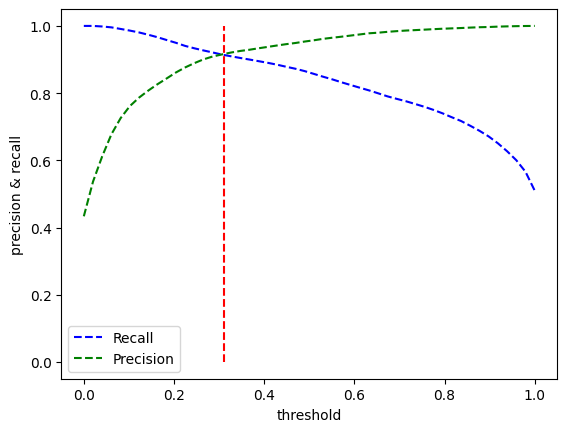

In [33]:
plt.plot(thr, recall[:-1],'b--',label= "Recall")
plt.plot(thr, precision[:-1],'g--',label= "Precision") 
plt.xlabel('threshold')
plt.ylabel('precision & recall')
plt.legend()
plt.vlines(0.31, 0, 1, color='red', linestyle='--')

In [36]:
ytrain_pred_probateste2 = ytrain_pred_proba2[:,1]
th = 0.31
ytrain_pred_probateste2 = [1 if i>th else 0 for i in ytrain_pred_probateste2]


In [37]:
matriz3 = mt.confusion_matrix(y_train_class, ytrain_pred_probateste2)
matriz3

array([[38629,  2458],
       [ 2841, 28587]])

In [39]:
matriz

array([[39884,  1203],
       [ 4487, 26941]])

In [40]:
matriz2

array([[38188,  2899],
       [ 2482, 28946]])

### dados treino e validação

In [44]:
x_train_val = x_train_class.loc[:, features]
x_val_ = x_val_class.loc[:, features]
k = np.arange(3, 50, 2)
acc_list_val = []
prec_list_val =  []
recall_list_val = []
f1_list_val = []


In [65]:
for i in range(len(k)):
    knn_model_val = nb.KNeighborsClassifier(n_neighbors = k[i], n_jobs=-1)
    knn_model_val.fit(x_train_val, y_train_class)
    ypred_val = knn_model_val.predict(x_val_)
    knn_acc_val = accuracy(y_val_class, ypred_val)
    acc_list_val.append(knn_acc_val)
    knn_prec_val = precision(y_val_class, ypred_val, 1)
    prec_list_val.append(knn_prec_val)
    knn_recall_val = recall(y_val_class, ypred_val, 1)
    recall_list_val.append(knn_recall_val)
    knn_f1_val = f1_score(y_val_class, ypred_val)
    f1_list_val.append(knn_f1_val)

/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sk

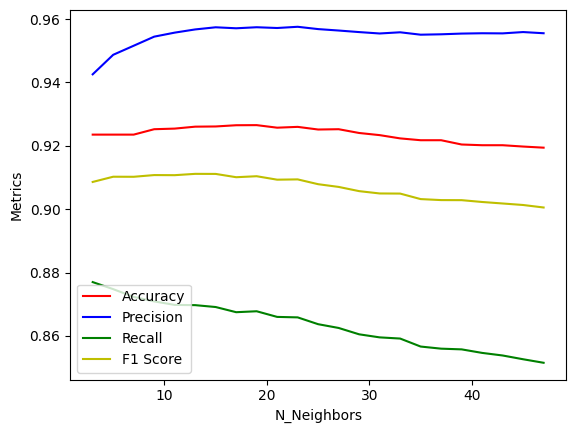

In [68]:
plt.plot(k[:i], acc_list_val[:i], 'r-', label = 'Accuracy')
plt.plot(k[:i], prec_list_val[:i], 'b-', label = 'Precision')
plt.plot(k[:i], recall_list_val[:i], 'g-', label = 'Recall')
plt.plot(k[:i], f1_list_val[:i], 'y-', label = 'F1 Score')
plt.xlabel('N_Neighbors')
plt.ylabel('Metrics')
plt.legend()

In [118]:
k_best_val = f1_list_val.index(max(f1_list_val))
k_best_val # posição 5 
k[k_best_val] # ncluster = 13

13

In [114]:
acc_list_val[5]

0.9260272209530551

In [119]:
knn_model_val = nb.KNeighborsClassifier(n_neighbors = 13, n_jobs=-1)
knn_model_val.fit(x_train_val, y_train_class)
ypred_val13 = knn_model_val.predict(x_val_)


/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [120]:
knn_acc_val = accuracy(y_val_class, ypred_val13)
knn_prec_val = precision(y_val_class, ypred_val13, 1)
knn_recall_val = recall(y_val_class, ypred_val13, 1)
knn_f1_val = f1_score(y_val_class, ypred_val13)

In [80]:
prec_val, rec_val, th_val = mt.precision_recall_curve(y_val_class, ypredproba1_val)

In [81]:
fpr_val, tpr_val, th2_val = mt.roc_curve(y_val_class, ypredproba2_val)

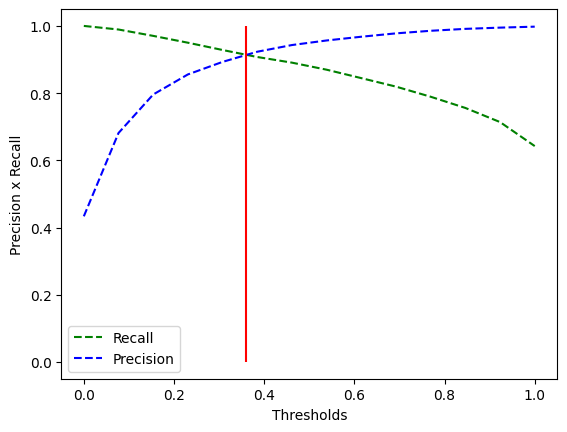

In [85]:
plt.plot(th_val, rec_val[:-1], 'g--', label='Recall')
plt.plot(th_val, prec_val[:-1], 'b--', label='Precision')
plt.xlabel("Thresholds")
plt.ylabel('Precision x Recall')
plt.legend()
plt.vlines(0.36, 0, 1, color='red')

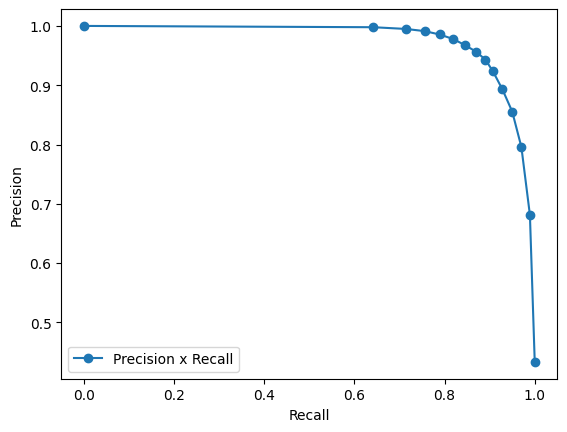

In [89]:
plt.plot(rec_val, prec_val, 'o-', label='Precision x Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()


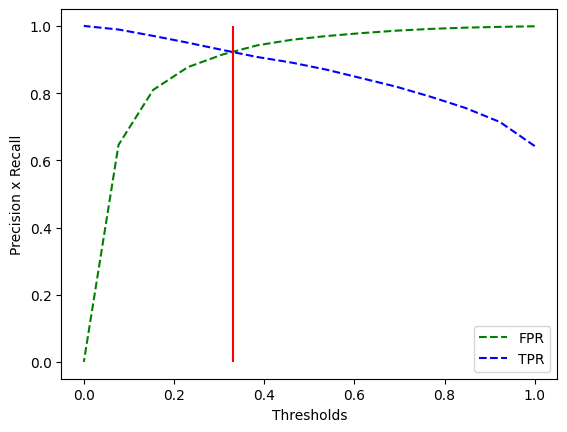

In [88]:
plt.plot(th2_val, 1-fpr_val, 'g--', label='FPR')
plt.plot(th2_val, tpr_val, 'b--', label='TPR')
plt.xlabel("Thresholds")
plt.ylabel('Precision x Recall')
plt.legend()
plt.vlines(0.33, 0, 1, color='red')

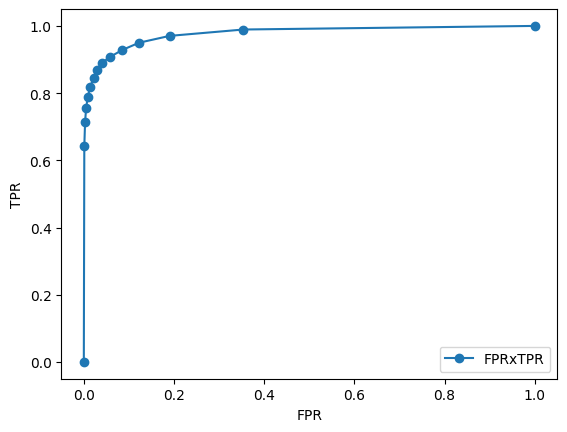

In [90]:
plt.plot(fpr_val, tpr_val, 'o-', label='FPRxTPR')
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.legend()


In [91]:
th1 = 0.36
ypredproba1_val = [1 if i>th1 else 0 for i in ypredproba1_val]

In [92]:
th2 = 0.33
ypredproba2_val = [1 if i>th2 else 0 for i in ypredproba2_val]

In [93]:
matriz1 = mt.confusion_matrix(y_val_class, ypredproba1_val)
matriz1

array([[16593,  1017],
       [ 1246, 12223]])

In [94]:
matriz2 = mt.confusion_matrix(y_val_class, ypredproba2_val)
matriz2

array([[16593,  1017],
       [ 1246, 12223]])

In [96]:
matriz3 = mt.confusion_matrix(y_val_class, ypred_val13)
matriz3

array([[17080,   530],
       [ 1755, 11714]])

### dados de treino, validação e teste (produção)

In [97]:
x_test_ = x_test_class.loc[:,features]

In [103]:
knn_model_test = nb.KNeighborsClassifier(n_neighbors=13, n_jobs=-1)
knn_model_test.fit(pd.concat([x_train_fts, x_val_]), pd.concat([y_train_class, y_val_class])) 
ypred_test = knn_model_test.predict(x_test_)

/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [105]:
knn_acc_test = accuracy(y_test_class, ypred_test)
knn_acc_test

0.9285134978565636

In [106]:
knn_precision_test = precision(y_test_class, ypred_test, 1)
knn_precision_test

0.9572279892349097

In [107]:
knn_recall_test = recall(y_test_class, ypred_test, 1)
knn_recall_test

0.8762868455785305

In [108]:
knn_f1score_test = f1_score(y_test_class, ypred_test)
knn_f1score_test

0.9149708300794708

In [110]:
k = np.arange(3, 50, 2)
acc_list_test_t = []
prec_list_test_t =  []
recall_list_test_t = []
f1_list_test_t = []

In [111]:
for i in range(len(k)):
    knn_model_test_t = nb.KNeighborsClassifier(n_neighbors = k[i], n_jobs=-1)
    knn_model_test_t.fit(pd.concat([x_train_fts, x_val_]), pd.concat([y_train_class, y_val_class]))
    ypred_test_t = knn_model_test_t.predict(x_test_)
    knn_acc_test_t = accuracy(y_test_class, ypred_test_t)
    acc_list_test_t.append(knn_acc_test_t)
    knn_prec_test_t = precision(y_test_class, ypred_test_t, 1)
    prec_list_test_t.append(knn_prec_test_t)
    knn_recall_test_t = recall(y_test_class, ypred_test_t, 1)
    recall_list_test_t.append(knn_recall_test_t)
    knn_f1_test_t = f1_score(y_test_class, ypred_test_t)
    f1_list_test_t.append(knn_f1_test_t)

/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tfmeneghello/.pyenv/versions/3.9.18/envs/fund_ml/lib/python3.9/site-packages/sk

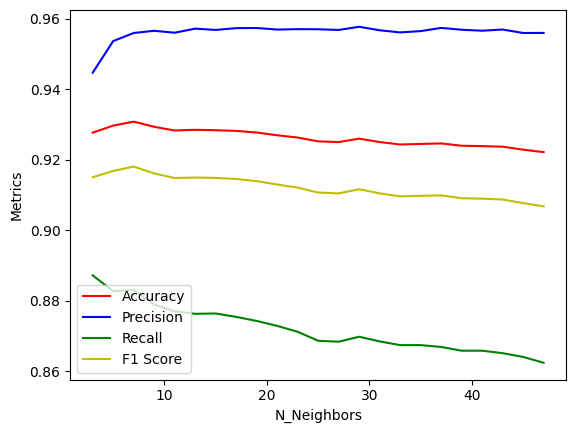

In [112]:
plt.plot(k[:i], acc_list_test_t[:i], 'r-', label = 'Accuracy')
plt.plot(k[:i], prec_list_test_t[:i], 'b-', label = 'Precision')
plt.plot(k[:i], recall_list_test_t[:i], 'g-', label = 'Recall')
plt.plot(k[:i], f1_list_test_t[:i], 'y-', label = 'F1 Score')
plt.xlabel('N_Neighbors')
plt.ylabel('Metrics')
plt.legend()

In [113]:
k_best = f1_list_test_t.index(max(f1_list_test_t))
nnei = k[k_best]
nnei

7

### Tabela Final

In [125]:
df_knn = tabela("KNN_Classifier", "n_neighbors", 13, 
                knn_acc_train, knn_acc_val, knn_acc_test,
                knn_prec_train, knn_prec_val, knn_precision_test,
                knn_recall_train, knn_recall_val, knn_recall_test,
                knn_f1_train, knn_f1_val, knn_f1score_test)
df_knn

,KNN_Classifier,n_neighbors,Accuracy,Precision,Recall,F1_Score
0,dataset train,13,0.934800,0.964995,0.881539,0.921381
1,dataset validation,13,0.926478,0.956713,0.869701,0.911134
2,dataset test,13,0.928513,0.957228,0.876287,0.914971


## 2) Decision Tree

### dados de treino

In [7]:
d = np.arange(1, 51, 1)
acc_l = []
prec_l = []
rec_l = []
f1_l = []

for i in range(len(d)):
    #definição
    model = tr.DecisionTreeClassifier(max_depth=d[i])
    #treinamento
    model.fit(x_train_class, y_train_class)
    ypred_train = model.predict(x_train_class)
   
    accuracy_train = accuracy(y_train_class, ypred_train)
    accuracy_train_list = metrics_list(acc_l, accuracy_train)
    precision_train = precision(y_train_class,  ypred_train, 1)
    precision_train_list = metrics_list(prec_l, precision_train)
    recall_train = recall(y_train_class,  ypred_train, 1)
    recall_train_list = metrics_list(rec_l, recall_train)
    f1score_train = f1_score(y_train_class, ypred_train)
    f1score_train_list = metrics_list(f1_l, f1score_train)                            



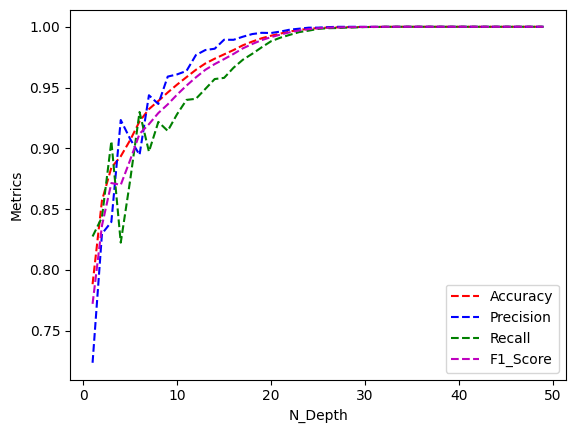

In [8]:
plt.plot(d[:i], accuracy_train_list[:i], 'r--', label="Accuracy")
plt.plot(d[:i], precision_train_list[:i], 'b--', label="Precision")
plt.plot(d[:i], recall_train_list[:i], 'g--', label="Recall")
plt.plot(d[:i], f1score_train_list[:i], 'm--', label="F1_Score")
plt.xlabel("N_Depth")
plt.ylabel('Metrics')
plt.legend()

In [17]:
best_nd = f1score_train_list.index(max(f1score_train_list))
d[best_nd]

34

In [21]:
model_proba = tr.DecisionTreeClassifier(max_depth=9)
model_proba.fit(x_train_class, y_train_class)
ypred_train_proba = model_proba.predict_proba(x_train_class)
ypred_train_proba1 = ypred_train_proba[:,1]
ypred_train_proba2 = ypred_train_proba[:,1]
#accuracy_train = accuracy(y_train_class, ypred_train)
#accuracy_train_list = metrics_list(acc_l, accuracy_train)
#precision_train = precision(y_train_class,  ypred_train, 1)
#precision_train_list = metrics_list(prec_l, precision_train)
#recall_train = recall(y_train_class,  ypred_train, 1)
#recall_train_list = metrics_list(rec_l, recall_train)
#f1score_train = f1_score(y_train_class, ypred_train)
#f1score_train_list = metrics_list(f1_l, f1score_train)

In [23]:
fpr, tpr, threshold = mt.roc_curve(y_train_class, ypred_train_proba1)

Text(0, 0.5, 'TPR')

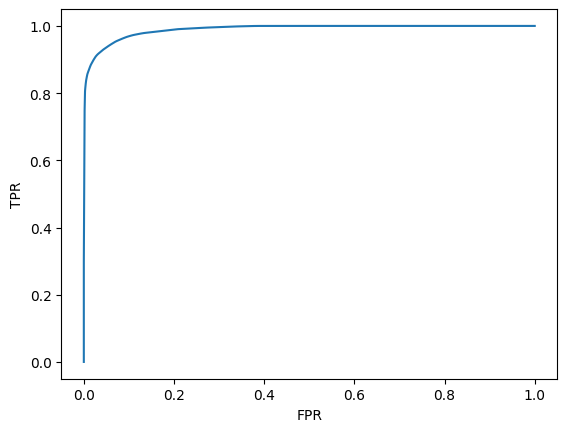

In [24]:
plt.plot(fpr, tpr, label="Roc Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

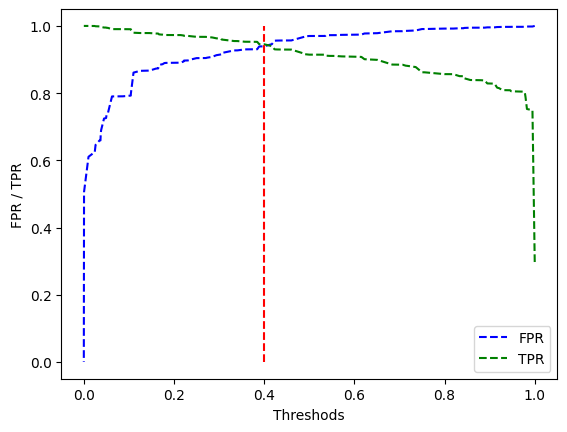

In [41]:
plt.plot(threshold, 1-fpr, 'b--', label="FPR")
plt.plot(threshold, tpr, 'g--', label="TPR")
plt.xlabel("Threshods")
plt.ylabel("FPR / TPR")
plt.legend()
plt.vlines(0.4, 0, 1, 'r', '--')

In [35]:
precisio, recal, th = mt.precision_recall_curve(y_train_class, ypred_train_proba2)

Text(0, 0.5, 'Precision')

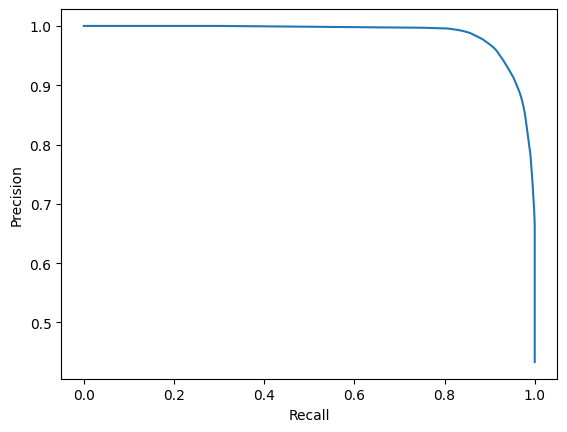

In [36]:
plt.plot(recal, precisio, label="Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

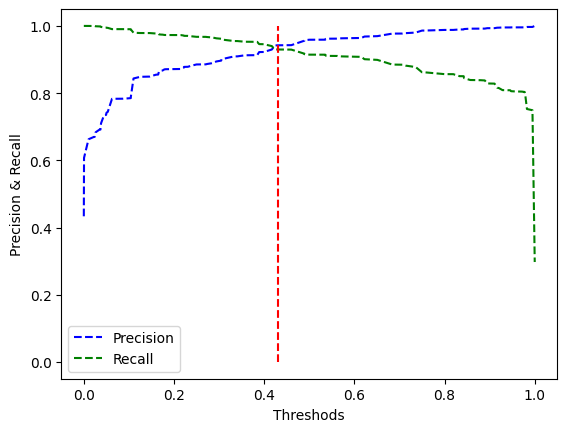

In [39]:
plt.plot(th, precisio[:-1], 'b--', label="Precision")
plt.plot(th, recal[:-1], 'g--', label="Recall")
plt.xlabel("Threshods")
plt.ylabel("Precision & Recall")
plt.legend()
plt.vlines(0.43, 0, 1, 'r', '--')

In [44]:
th = 0.43
ypred_train_proba2 = [1 if i>th else 0 for i in ypred_train_proba2]


In [138]:
model_train = tr.DecisionTreeClassifier(max_depth=14)
model_train.fit(x_train_class, y_train_class)
ypred_train = model_train.predict(x_train_class)

In [139]:
acc_train = accuracy(y_train_class, ypred_train)

prec_train = precision(y_train_class, ypred_train,1)

rec_train = recall(y_train_class, ypred_train, 1)

f1_train = f1_score(y_train_class, ypred_train)

### dados de treino e validação

In [48]:
depth = np.arange(1,51,1)
acc_l = []
prec_l = []
rec_l = []
f1_l = []

for i in depth:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train_class, y_train_class)
    ypred_val = model.predict(x_val_class)
    accuracy_val = accuracy(y_val_class, ypred_val)
    accuracy_val_list = metrics_list(acc_l, accuracy_val)
    precision_val = precision(y_val_class, ypred_val, 1)
    precision_val_list = metrics_list(prec_l, precision_val)
    recall_val = recall(y_val_class, ypred_val, 1)
    recall_val_list = metrics_list(rec_l, recall_val)
    f1score_val = f1_score(y_val_class, ypred_val)
    f1score_val_list = metrics_list(f1_l, f1score_val)

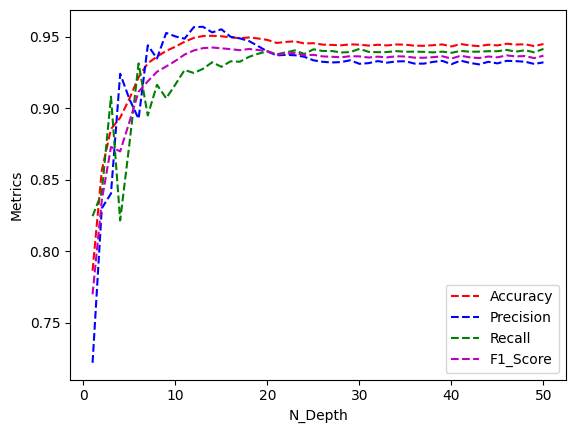

In [49]:
plt.plot(d, accuracy_val_list, 'r--', label="Accuracy")
plt.plot(d, precision_val_list, 'b--', label="Precision")
plt.plot(d, recall_val_list, 'g--', label="Recall")
plt.plot(d, f1score_val_list, 'm--', label="F1_Score")
plt.xlabel("N_Depth")
plt.ylabel('Metrics')
plt.legend()

In [50]:
best_n = f1score_val_list.index(max(f1score_val_list))
n_depth = d[best_n]
n_depth ## 14

14

In [84]:
model_proba = tr.DecisionTreeClassifier(max_depth=14)
model_proba.fit(x_train_class, y_train_class)
ypred_val_proba = model_proba.predict_proba(x_val_class)
ypred_val_proba = ypred_val_proba[:,1]

In [85]:
ypred_val_proba2 = ypred_val_proba[:,1]


In [62]:
fpr, tpr, ths = mt.roc_curve(y_val_class, ypred_val_proba)

Text(0, 0.5, 'TPR')

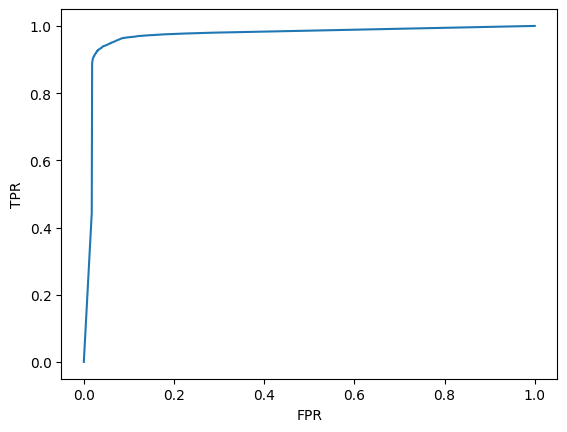

In [64]:
plt.plot(fpr, tpr, '-', label = "FPRxTPR")
plt.xlabel("FPR")
plt.ylabel("TPR")

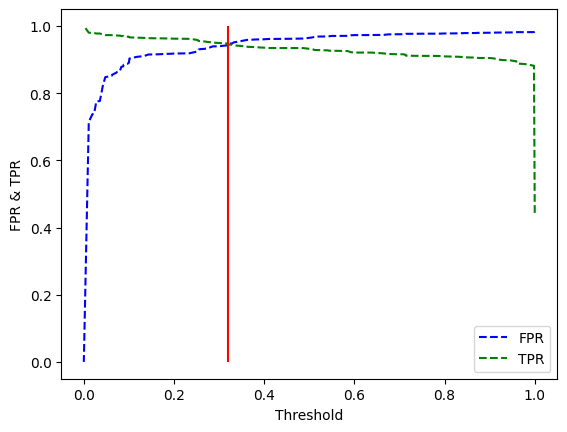

In [73]:
plt.plot(ths, 1-fpr, 'b--', label='FPR')
plt.plot(ths, tpr, 'g--', label='TPR')
plt.xlabel('Threshold')
plt.ylabel("FPR & TPR")
plt.legend()
plt.vlines(0.32, 0, 1, 'r') 

In [76]:
ths = 0.32
ypred_val_proba = [1 if i>ths else 0 for i in ypred_val_proba]
f1_test = f1_score(y_val_class, ypred_val_proba)
f1_test

0.9383900243488525

In [77]:
f1score_val_list[best_n]

0.942536501144766

In [86]:
precisio, recal, th = mt.precision_recall_curve(y_val_class, ypred_val_proba2)

Text(0, 0.5, 'precision')

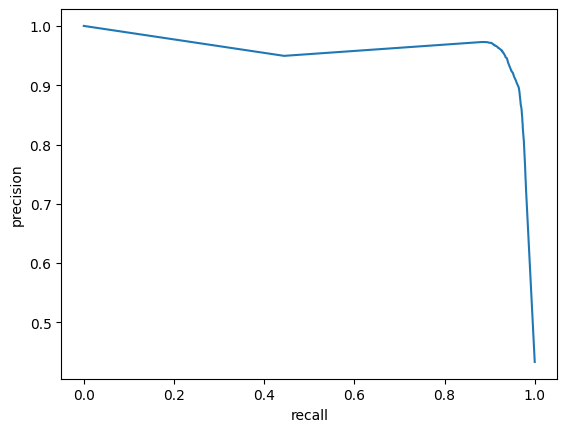

In [87]:
plt.plot(recal, precisio, '-')
plt.xlabel("recall")
plt.ylabel("precision")

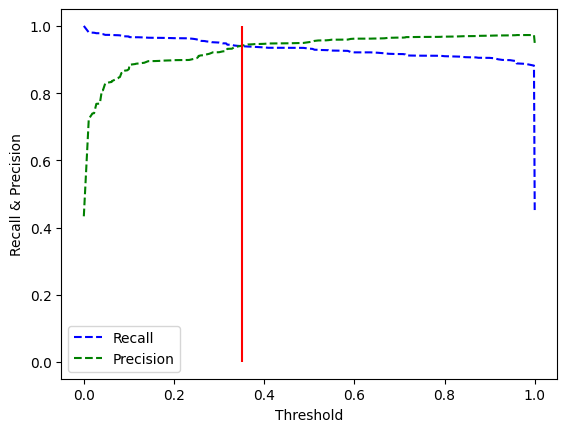

In [91]:
plt.plot(th, recal[:-1], 'b--', label='Recall')
plt.plot(th, precisio[:-1], 'g--', label='Precision')
plt.xlabel('Threshold')
plt.ylabel("Recall & Precision")
plt.legend()
plt.vlines(0.35, 0, 1, 'r') 

In [92]:
th = 0.32
ypred_val_proba2 = [1 if i>th else 0 for i in ypred_val_proba2]
f1_test = f1_score(y_val_class, ypred_val_proba2)
f1_test

0.9380602796325672

In [134]:
model_val = tr.DecisionTreeClassifier(max_depth=14)
model_val.fit(x_train_class, y_train_class)
ypred_valt = model_proba.predict(x_val_class)

In [135]:
acc_val = accuracy(y_val_class, ypred_valt)

prec_val = precision(y_val_class, ypred_valt,1)

rec_val = recall(y_val_class, ypred_valt, 1)

f1_val = f1_score(y_val_class, ypred_valt)

### dados treino, validação e teste (produção)

In [107]:
model_test = tr.DecisionTreeClassifier(max_depth=14)
model_test.fit(pd.concat([x_train_class, x_val_class]), pd.concat([y_train_class, y_val_class]))
ypred_test = model_test.predict(x_test_class)


                            

In [111]:
print("A acurácia do modelo em produção com 14 folhas de profundidada é: {}".format(accuracy(y_test_class, ypred_test)))
print()
print("A precisão do modelo em produção com 14 folhas de profundidada é: {}".format(precision(y_test_class, ypred_test,1)))
print()
print("O recall do modelo em produção com 14 folhas de profundidada é: {}".format(recall(y_test_class, ypred_test, 1)))
print()
print("O F1_Score do modelo em produção com 14 folhas de profundidada é: {}".format(f1_score(y_test_class, ypred_test)))
print()

A acurácia do modelo em produção com 14 folhas de profundidada é: 0.9560112771791603

A precisão do modelo em produção com 14 folhas de profundidada é: 0.9611291486291487

O recall do modelo em produção com 14 folhas de profundidada é: 0.9377034755829301

O F1_Score do modelo em produção com 14 folhas de profundidada é: 0.9492718122299916



In [112]:
model_test = tr.DecisionTreeClassifier(max_depth=14)
model_test.fit(pd.concat([x_train_class, x_val_class]), pd.concat([y_train_class, y_val_class]))
ypred_test_proba = model_test.predict_proba(x_test_class)

In [113]:
ypred_test_proba1 = ypred_test_proba[:,1]
ypred_test_proba2 = ypred_test_proba[:,1]

In [115]:
prec, rec, th = mt.precision_recall_curve(y_test_class, ypred_test_proba2)

Text(0, 0.5, 'precision')

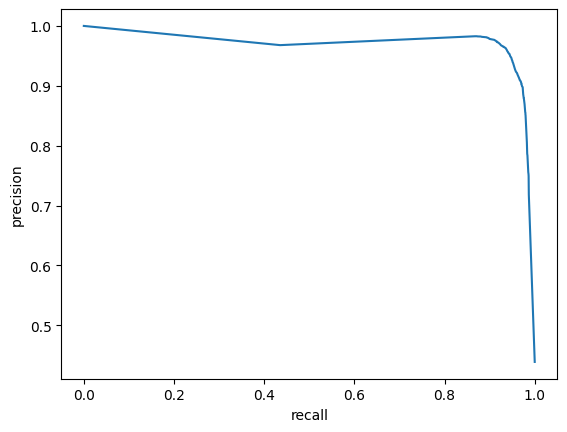

In [117]:
plt.plot(rec, prec, '-')
plt.xlabel("recall")
plt.ylabel("precision")

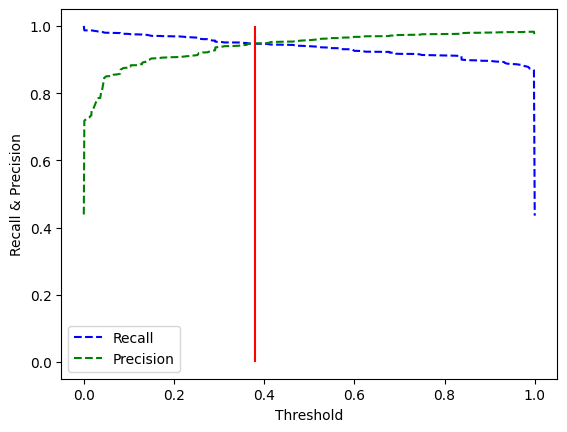

In [120]:
plt.plot(th, rec[:-1], 'b--', label='Recall')
plt.plot(th, prec[:-1], 'g--', label='Precision')
plt.xlabel('Threshold')
plt.ylabel("Recall & Precision")
plt.legend()
plt.vlines(0.38, 0, 1, 'r') 

In [122]:
th = 0.38
ypred_test_proba2 = [1 if i>th else 0 for i in ypred_test_proba2]

In [123]:
f1proba2 = f1_score(y_test_class, ypred_test_proba2)
f1proba2

0.9474796390050627

In [124]:
fpr, tpr, ths = mt.roc_curve(y_test_class, ypred_test_proba1)

Text(0, 0.5, 'tpr')

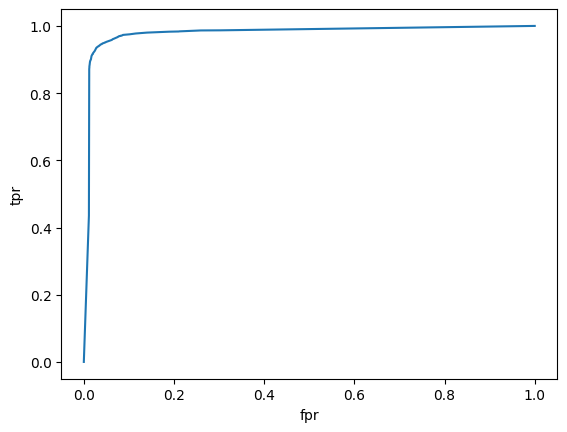

In [125]:
plt.plot(fpr, tpr, '-')
plt.xlabel("fpr")
plt.ylabel("tpr")

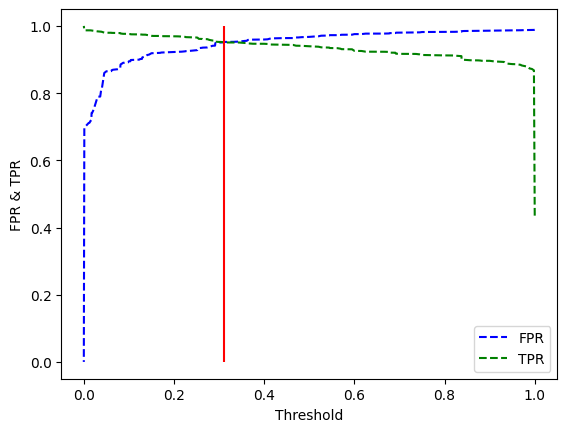

In [128]:
plt.plot(ths, 1-fpr, 'b--', label='FPR')
plt.plot(ths, tpr, 'g--', label='TPR')
plt.xlabel('Threshold')
plt.ylabel("FPR & TPR")
plt.legend()
plt.vlines(0.31, 0, 1, 'r') 

In [129]:
th = 0.31
ypred_test_proba1 = [1 if i>th else 0 for i in ypred_test_proba1]

In [130]:
f1proba1 = f1_score(y_test_class, ypred_test_proba1)
f1proba1

0.9452414275717284

### tabela final

In [132]:
acc_test = accuracy(y_test_class, ypred_test)

prec_test = precision(y_test_class, ypred_test,1)

rec_test = recall(y_test_class, ypred_test, 1)

f1_test = f1_score(y_test_class, ypred_test)


In [140]:
df_dtc = tabela("Decision_Tree_Classifier", "max_depth", 14, 
                acc_train, acc_val, acc_test,
                prec_train, prec_val, prec_test,
                recall_train, recall_val, rec_test,
                f1_train, f1_val, f1_test)
df_dtc

,Decision_Tree_Classifier,max_depth,Accuracy,Precision,Recall,F1_Score
0,dataset train,14,0.973730,0.981851,1.000000,0.969305
1,dataset validation,14,0.950706,0.953568,0.941570,0.942467
2,dataset test,14,0.956011,0.961129,0.937703,0.949272


## 3) Random Forest

### corrigir erros

In [10]:
def random_forest_proba(n, d, x_train, y_train, x_test):
    model = en.RandomForestClassifier(n_estimators = n, max_depth = d, 
                                      bootstrap = True, n_jobs= -1, random_state = 42)
    model.fit(x_train, y_train)
    ypred_proba = model.predict_proba(x_test)
    ypred_proba = ypred_proba[:,1]
    return ypred_proba

In [14]:
proba_train_list = []

for i in estimators:
    for j in depth:
        rf_train = random_forest(i, j, x_train_class, y_train_class, x_train_class)

In [15]:
fpr, tpr, ths = mt.roc_curve(y_train_class, rf_train)
#fazer def roc_curve

In [41]:
len(fpr)

3581

In [42]:
len(tpr)

3581

In [29]:
ths

0.39

Text(0, 0.5, 'tpr')

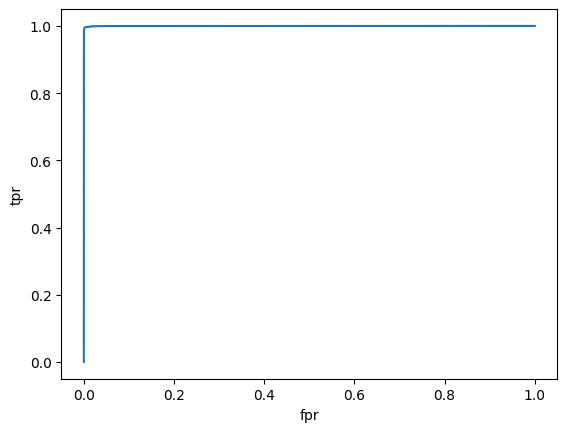

In [16]:
plt.plot(fpr, tpr, '-')
plt.xlabel("fpr")
plt.ylabel("tpr")

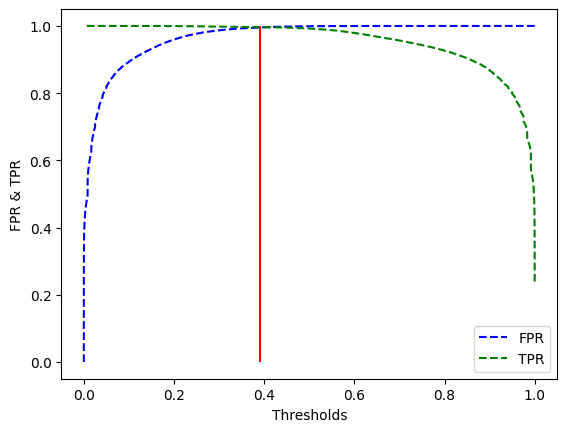

In [20]:
plt.plot(ths, 1-fpr, 'b--', label='FPR')
plt.plot(ths, tpr, 'g--', label='TPR')
plt.xlabel('Thresholds')
plt.ylabel("FPR & TPR")
plt.legend()
plt.vlines(0.39, 0, 1, 'r') 

In [43]:
ths = 0.39
rf_train = [1 if ths>0.39 else 0 for i in rf_train]

In [44]:
#quando definido o th do roc vc só vai ter um valor
rf_accuracy_roc_train = accuracy(y_train_class, rf_train)
rf_precision_roc_train = precision(y_train_class, rf_train, 1)
rf_recall_roc_train = recall(y_train_class, rf_train, 1)
rf_f1_roc_train = f1_score(y_train_class, rf_train)

#fazer DEF de todas as listas junto

In [45]:
print("A acurácia do modelo com dtaset train definido th pela roc curve é: {}".format(rf_accuracy_roc_train))
print()
print("A precisão do modelo com dtaset train definido th pela roc curve é: {}".format(rf_precision_roc_train))
print()
print("O recall do modelo com dtaset train definido th pela roc curve é: {}".format(rf_recall_roc_train))
print()
print("O F1_score do modelo com dtaset train definido th pela roc curve é: {}".format(rf_f1_roc_train))
print()

A acurácia do modelo com dtaset train definido th pela roc curve é: 0.5666000137902503

A precisão do modelo com dtaset train definido th pela roc curve é: 0.0

O recall do modelo com dtaset train definido th pela roc curve é: 0.0

O F1_score do modelo com dtaset train definido th pela roc curve é: 0.0



### dados treino

In [6]:
def random_forest(e, d, x_train, y_train, x_test):
    model = en.RandomForestClassifier(n_estimators = e, max_depth = d, 
                                      bootstrap = True, n_jobs= -1, random_state = 42)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    return ypred

In [7]:
estimators = np.arange(90, 121, 1)
depth = np.arange(5, 41, 1)
rf_accuracy_train_list = []
rf_precision_train_list = []
rf_recall_train_list = []
rf_f1_train_list = []

In [9]:
for i in range(len(estimators)):
    for j in range(len(depth)):
        rf_train = random_forest(estimators[i], depth[j], x_train_class, y_train_class, x_train_class)
        rf_accuracy_train = accuracy(y_train_class, rf_train)
        rf_precision_train = precision(y_train_class, rf_train, 1)
        rf_recall_train = recall(y_train_class, rf_train, 1)
        rf_f1_train = f1_score(y_train_class, rf_train)
        rf_accuracy_train_list, rf_precision_train_list, rf_recall_train_list, rf_f1_train_list = metrics_list(rf_accuracy_train_list, rf_accuracy_train,
                                                                                                               rf_precision_train_list, rf_precision_train,
                                                                                                               rf_recall_train_list, rf_recall_train,
                                                                                                               rf_f1_train_list, rf_recall_train)
                                                              
        

In [16]:
rf_accuracy_train_list_matrix = rf_accuracy_train_list
rf_precision_train_list_matrix = rf_precision_train_list
rf_recall_train_list_matrix = rf_recall_train_list
rf_f1_train_list_matrix = rf_f1_train_list

In [17]:
rf_accuracy_train_list_matrix = np.array(rf_accuracy_train_list_matrix).reshape(len(estimators), len(depth))
rf_accuracy_train_list_matrix

array([[0.9193822 , 0.92862166, 0.93176584, ..., 1.        , 1.        ,
        1.        ],
       [0.91974074, 0.9287182 , 0.93190374, ..., 1.        , 1.        ,
        1.        ],
       [0.9199476 , 0.9285665 , 0.93200028, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.91958905, 0.92823554, 0.93235882, ..., 1.        , 1.        ,
        1.        ],
       [0.91982348, 0.92831828, 0.93234503, ..., 1.        , 1.        ,
        1.        ],
       [0.91976832, 0.92853892, 0.93242777, ..., 1.        , 1.        ,
        1.        ]])

In [18]:
rf_precision_train_list_matrix = np.array(rf_precision_train_list_matrix).reshape(len(estimators), len(depth))
rf_precision_train_list_matrix

array([[0.9173791 , 0.92396641, 0.92550456, ..., 1.        , 1.        ,
        1.        ],
       [0.9179124 , 0.92417536, 0.92569261, ..., 1.        , 1.        ,
        1.        ],
       [0.91822544, 0.92412099, 0.92581879, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.91867578, 0.92417184, 0.92783173, ..., 1.        , 1.        ,
        1.        ],
       [0.91891273, 0.92407683, 0.927857  , ..., 1.        , 1.        ,
        1.        ],
       [0.9190392 , 0.92436295, 0.92800904, ..., 1.        , 1.        ,
        1.        ]])

In [19]:
rf_recall_train_list_matrix = np.array(rf_recall_train_list_matrix).reshape(len(estimators), len(depth))
rf_recall_train_list_matrix

array([[0.89455263, 0.91020746, 0.91631666, ..., 1.        , 1.        ,
        1.        ],
       [0.894839  , 0.91020746, 0.91644394, ..., 1.        , 1.        ,
        1.        ],
       [0.89499809, 0.90988927, 0.91653939, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.89356625, 0.90899835, 0.91510755, ..., 1.        , 1.        ,
        1.        ],
       [0.89388443, 0.90931653, 0.91504391, ..., 1.        , 1.        ,
        1.        ],
       [0.89359807, 0.90953926, 0.91507573, ..., 1.        , 1.        ,
        1.        ]])

In [37]:
rf_f1_train_list_matrix = np.array(rf_f1_train_list_matrix).reshape(len(estimators), len(depth))
rf_f1_train_list_matrix

array([[0.89455263, 0.91020746, 0.91631666, ..., 1.        , 1.        ,
        1.        ],
       [0.894839  , 0.91020746, 0.91644394, ..., 1.        , 1.        ,
        1.        ],
       [0.89499809, 0.90988927, 0.91653939, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.89356625, 0.90899835, 0.91510755, ..., 1.        , 1.        ,
        1.        ],
       [0.89388443, 0.90931653, 0.91504391, ..., 1.        , 1.        ,
        1.        ],
       [0.89359807, 0.90953926, 0.91507573, ..., 1.        , 1.        ,
        1.        ]])

In [169]:
#achar o melhor parâmetro
indice = np.argmax(rf_accuracy_train_list_test)
linha, coluna = np.unravel_index(indice, rf_accuracy_train_list_test.shape)
est_max = estimators[linha]
depth_max = depth[coluna]

In [170]:
est_max

107

In [171]:
depth_max

14

<Figure size 2000x2000 with 0 Axes>

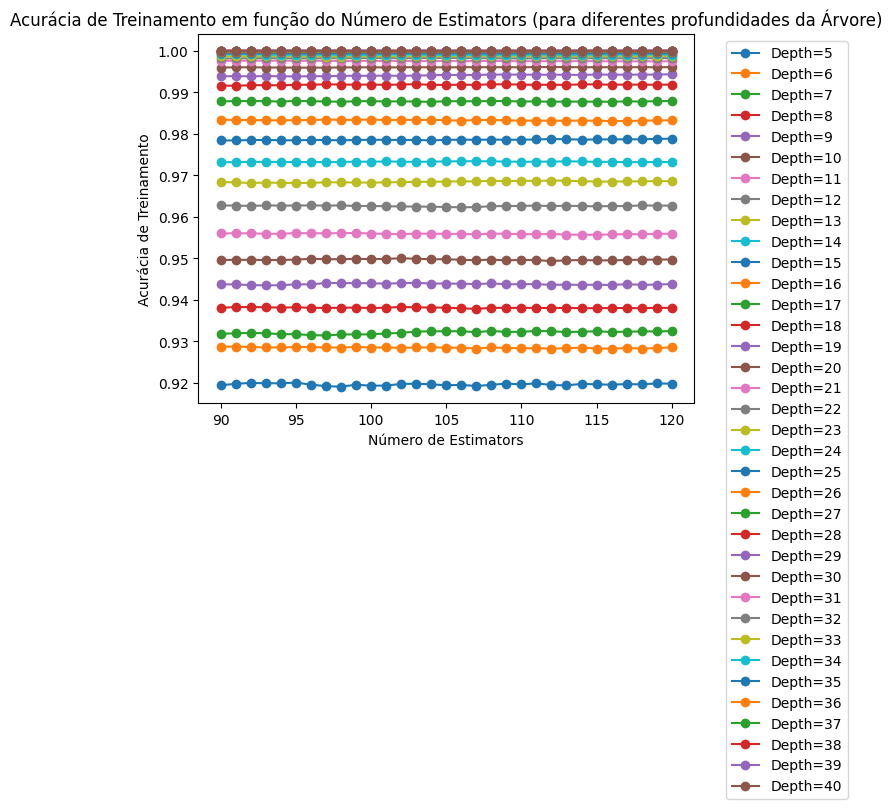

<Figure size 2000x2000 with 0 Axes>

In [22]:
for j in range(len(depth)):
    plt.plot(estimators, rf_accuracy_train_list_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('Acurácia de Treinamento')
plt.title('Acurácia de Treinamento em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

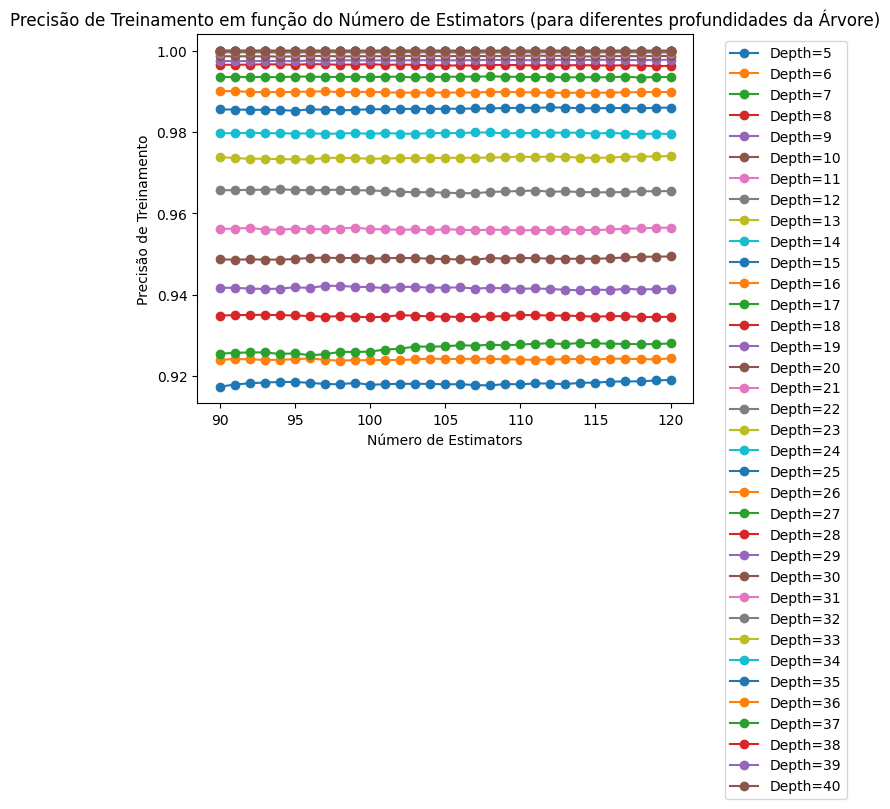

<Figure size 2000x2000 with 0 Axes>

In [34]:
for j in range(len(depth)):
    plt.plot(estimators, rf_precision_train_list_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('Precisão de Treinamento')
plt.title('Precisão de Treinamento em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

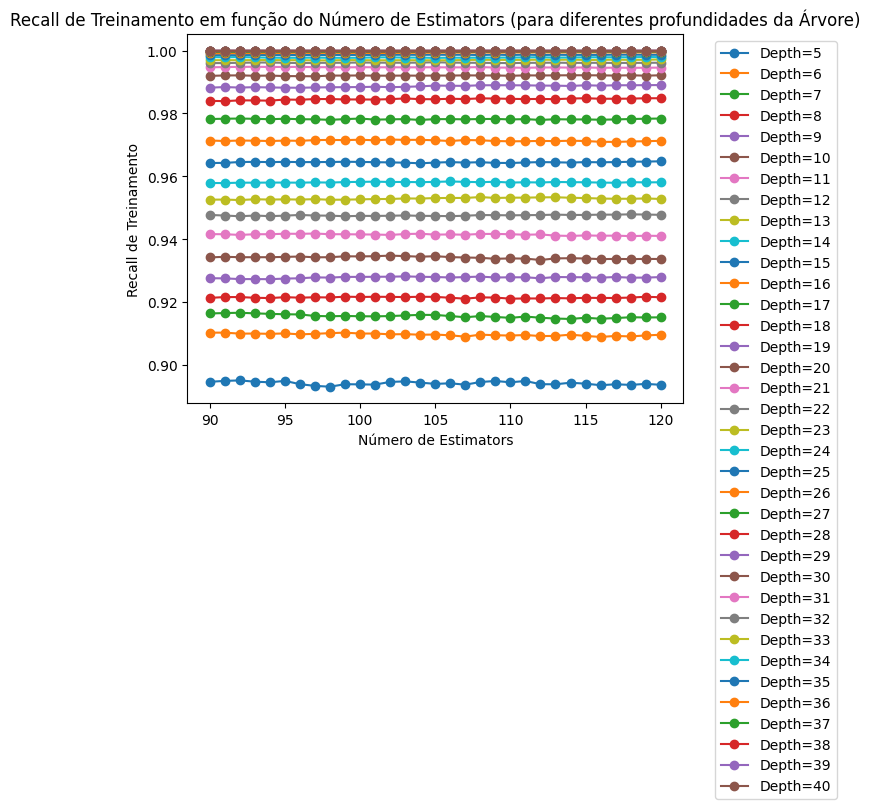

<Figure size 2000x2000 with 0 Axes>

In [35]:
for j in range(len(depth)):
    plt.plot(estimators, rf_recall_train_list_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('Recall de Treinamento')
plt.title('Recall de Treinamento em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

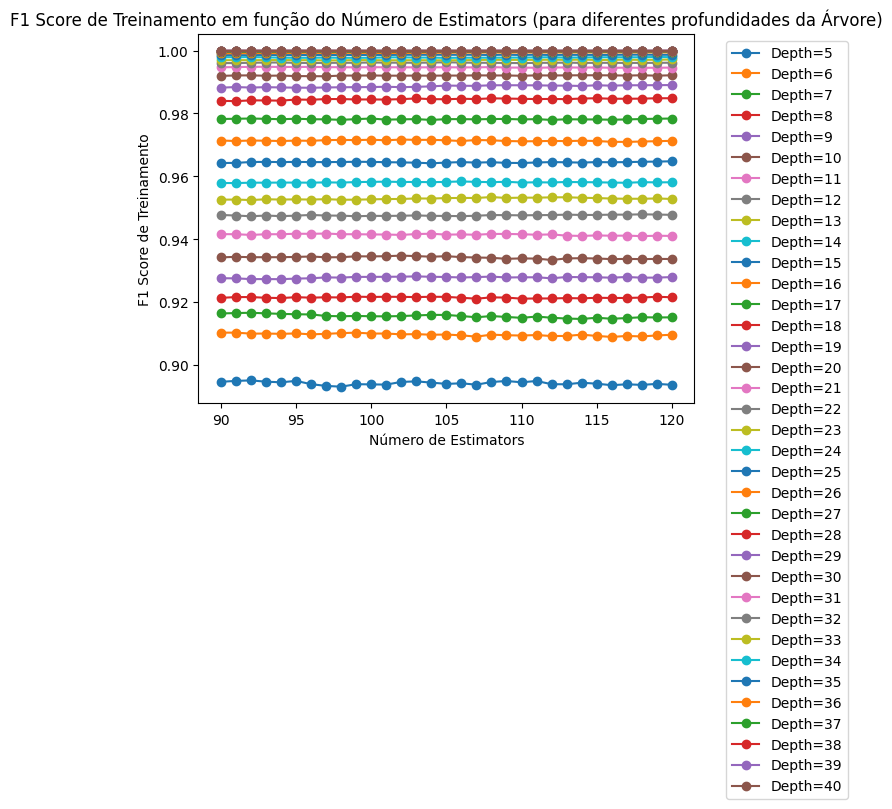

<Figure size 2000x2000 with 0 Axes>

In [38]:
for j in range(len(depth)):
    plt.plot(estimators, rf_f1_train_list_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('F1 Score de Treinamento')
plt.title('F1 Score de Treinamento em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

### dados de treino e validação

In [42]:
estimators = np.arange(90, 121, 1)
depth = np.arange(5, 41, 1)
rf_accuracy_val_list = []
rf_precision_val_list = []
rf_recall_val_list = []
rf_f1_val_list = []

In [43]:
for i in range(len(estimators)):
    for j in range(len(depth)):
        rf_val = random_forest(estimators[i], depth[j], x_train_class, y_train_class, x_val_class)
        rf_accuracy_val = accuracy(y_val_class, rf_val)
        rf_precision_val = precision(y_val_class, rf_val, 1)
        rf_recall_val = recall(y_val_class, rf_val, 1)
        rf_f1_val = f1_score(y_val_class, rf_val)
        rf_accuracy_val_list, rf_precision_val_list, rf_recall_val_list, rf_f1_val_list = metrics_list(rf_accuracy_val_list, rf_accuracy_val,
                                                                                                       rf_precision_val_list, rf_precision_val,
                                                                                                       rf_recall_val_list, rf_recall_val,
                                                                                                       rf_f1_val_list, rf_recall_val)
                                                              

In [48]:
def matrix(list):
    list_matrix = np.array(list).reshape(len(estimators), len(depth))
    return list_matrix

In [51]:
rf_accuracy_val_matrix = matrix(rf_accuracy_val_list)
rf_precision_val_matrix = matrix(rf_precision_val_list)
rf_recall_val_matrix = matrix(rf_recall_val_list)
rf_f1_val_matrix = matrix(rf_f1_val_list)

In [58]:
#definir melhores parâmetros estimators e depth
indice = np.argmax(rf_f1_val_matrix)
linha, coluna = np.unravel_index(indice, rf_f1_val_matrix.shape)
est_best = estimators[linha] #119
depth_best = depth[coluna] #35
print("Melhor número de estimator:{}".format(est_best))
print()
print("Melhor número de profundidade:{}".format(depth_best))

Melhor número de estimator:119

Melhor número de profundidade:35


<Figure size 2000x2000 with 0 Axes>

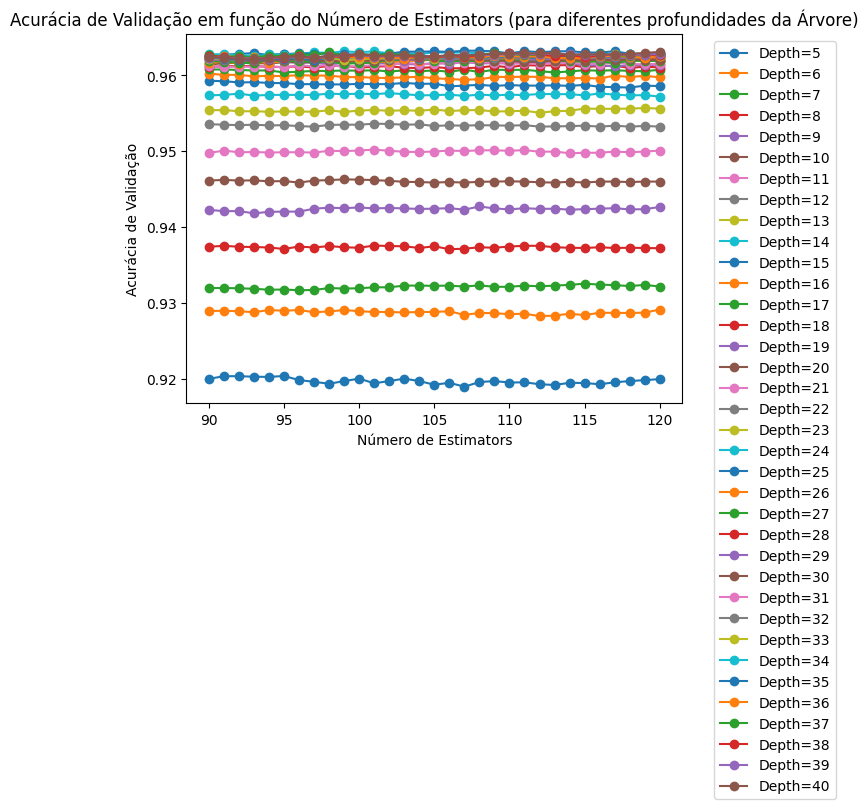

<Figure size 2000x2000 with 0 Axes>

In [57]:
for j in range(len(depth)):
    plt.plot(estimators, rf_accuracy_val_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('Acurácia de Validação')
plt.title('Acurácia de Validação em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

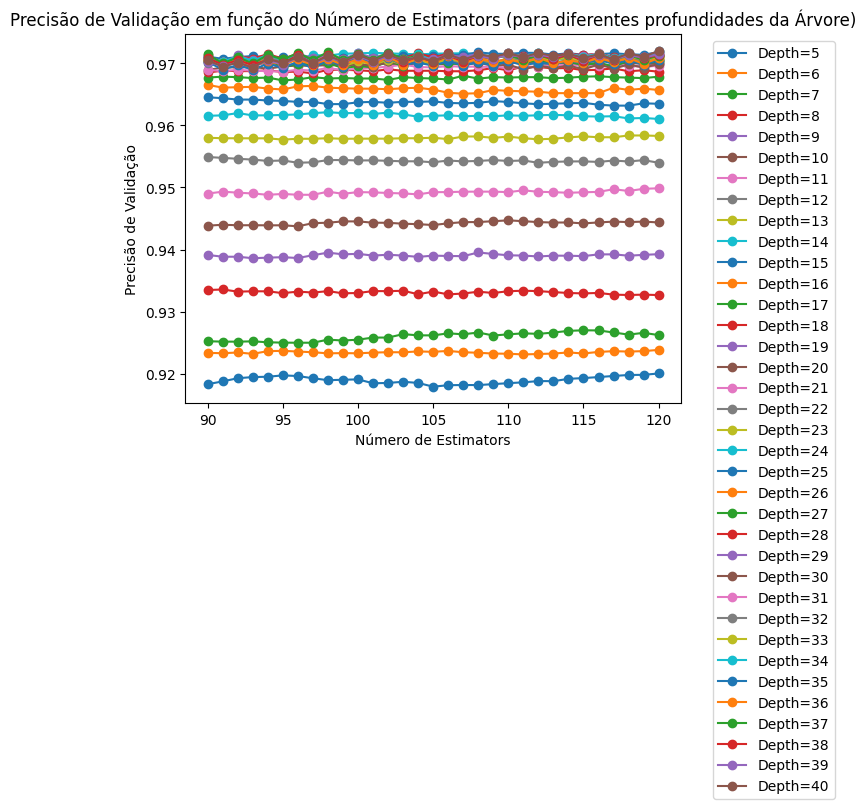

<Figure size 2000x2000 with 0 Axes>

In [56]:
for j in range(len(depth)):
    plt.plot(estimators, rf_precision_val_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('Precisão de Validação')
plt.title('Precisão de Validação em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

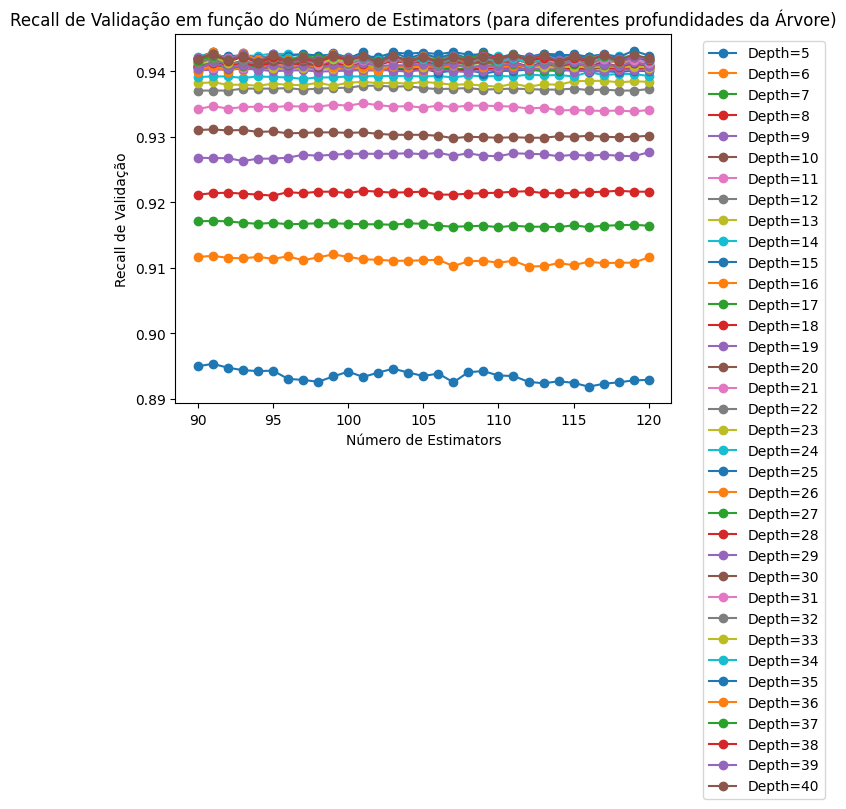

<Figure size 2000x2000 with 0 Axes>

In [55]:
for j in range(len(depth)):
    plt.plot(estimators, rf_recall_val_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('Recall de Validação')
plt.title('Recall de Validação em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

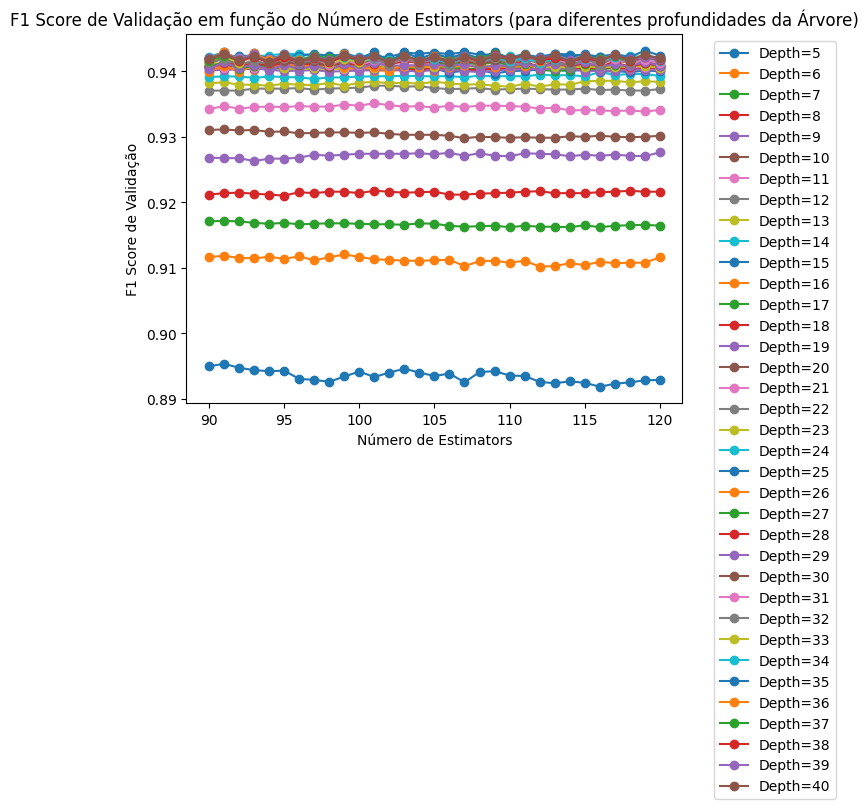

<Figure size 2000x2000 with 0 Axes>

In [54]:
for j in range(len(depth)):
    plt.plot(estimators, rf_f1_val_matrix[:,j], label=f'Depth={depth[j]}', marker='o')
plt.xlabel('Número de Estimators')
plt.ylabel('F1 Score de Validação')
plt.title('F1 Score de Validação em função do Número de Estimators (para diferentes profundidades da Árvore)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(20, 20))

### dados de treino, validação e teste (produção)

In [59]:
estimators = 119
depth = 35
rf_accuracy_test_list = []
rf_precision_test_list = []
rf_recall_test_list = []
rf_f1_test_list = []

In [60]:
rf_test = random_forest(estimators, depth, pd.concat([x_train_class, x_val_class]), pd.concat([y_train_class, y_val_class]), x_test_class)
rf_accuracy_test = accuracy(y_test_class, rf_test)
rf_precision_test = precision(y_test_class, rf_test, 1)
rf_recall_test = recall(y_test_class, rf_test, 1)
rf_f1_test = f1_score(y_test_class, rf_test)


In [62]:
print("A acurácia do modelo em produção com 119 árvores e 35 folhas de profundidada é: {}".format(rf_accuracy_test))
print()
print("A precisão do modelo em produção com 119 árvores e 35 folhas de profundidada é: {}".format(rf_precision_test))
print()
print("O recall do modelo em produção com 119 árvores e folhas de profundidada é: {}".format(rf_recall_test))
print()
print("O F1_Score do modelo em produção com 119 árvores e folhas de profundidada é: {}".format(rf_f1_test))
print()

A acurácia do modelo em produção com 119 árvores e 35 folhas de profundidada é: 0.9631560653458464

A precisão do modelo em produção com 119 árvores e 35 folhas de profundidada é: 0.9718118372156258

O recall do modelo em produção com 119 árvores e folhas de profundidada é: 0.9434227892652882

O F1_Score do modelo em produção com 119 árvores e folhas de profundidada é: 0.9574069113313688



In [95]:
model = en.RandomForestClassifier(n_estimators = 119, max_depth = 35, 
                                      bootstrap = True, n_jobs= -1, random_state = 42)
model.fit(pd.concat([x_train_class, x_val_class]), pd.concat([y_train_class, y_val_class]))
yhat_proba = model.predict_proba(x_test_class)
yhat_proba1 = yhat_proba[:,1]
yhat_proba2 = yhat_proba[:,1]

In [96]:
yhat_proba1

array([0.99159664, 1.        , 0.01680672, ..., 0.        , 1.        ,
       0.00840336])

In [97]:
prec, rec, th = mt.precision_recall_curve(y_test_class, yhat_proba1)

Text(0, 0.5, 'Precision')

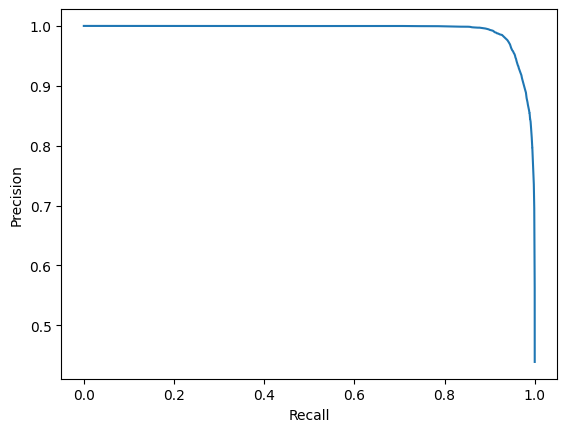

In [98]:
plt.plot(rec, prec, label="RecxPrec")
plt.xlabel("Recall")
plt.ylabel("Precision")

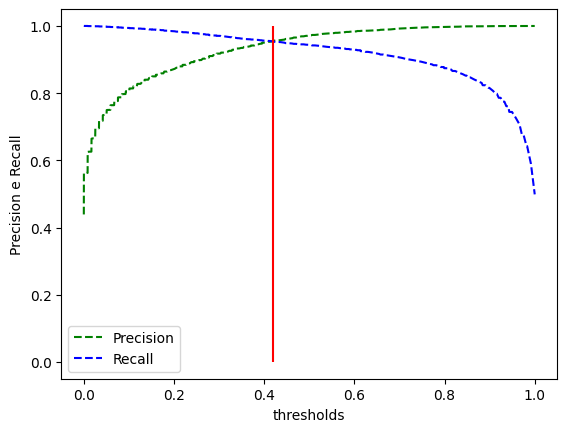

In [99]:
plt.plot(th, prec[:-1], 'g--', label="Precision")
plt.plot(th, rec[:-1], 'b--', label="Recall")
plt.xlabel("thresholds")
plt.ylabel("Precision e Recall")
plt.legend()
plt.vlines(0.42, 0, 1, 'r')

In [101]:
th=0.42
yhat_proba1 = [1 if i> th else 0 for i in yhat_proba1]
yhat_proba1

[1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [102]:
f1_prc = f1_score(y_test_class, yhat_proba1)
f1_prc

0.9541034103410341

In [103]:
fpr, tpr, ths = mt.roc_curve(y_test_class, yhat_proba2)

Text(0, 0.5, 'TPR')

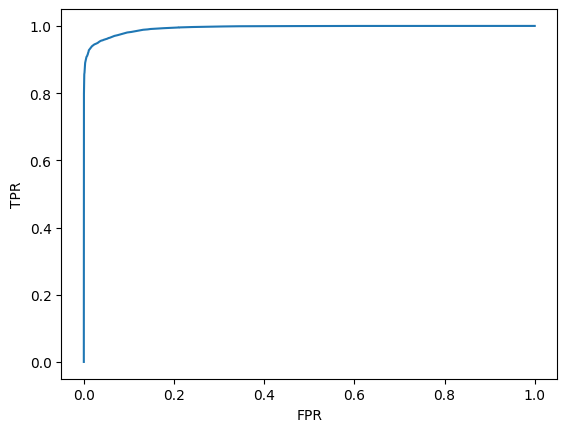

In [104]:
plt.plot(fpr, tpr, label="RecxPrec")
plt.xlabel("FPR")
plt.ylabel("TPR")

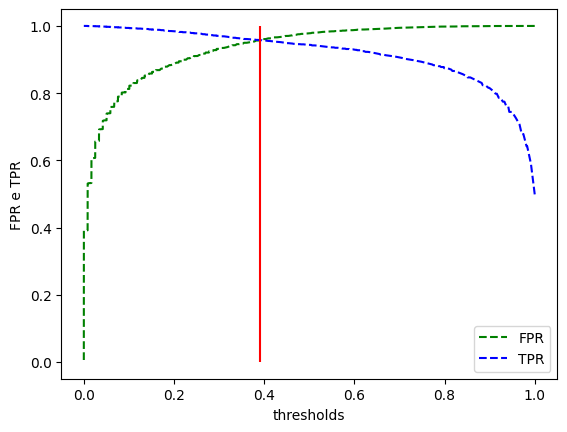

In [107]:
plt.plot(ths, 1-fpr, 'g--', label="FPR")
plt.plot(ths, tpr, 'b--', label="TPR")
plt.xlabel("thresholds")
plt.ylabel("FPR e TPR")
plt.legend()
plt.vlines(0.39, 0, 1, 'r')

In [109]:
ths = 0.39
yhat_proba2 = [1 if i > ths else 0 for i in yhat_proba2]

In [110]:
f1_roc = f1_score(y_test_class, yhat_proba2)
f1_roc

0.9521267285139157

### tabela final

In [63]:
estimators = 119
depth = 35
rf_train = random_forest(estimators, depth, x_train_class, y_train_class, x_train_class)
rf_accuracy_train = accuracy(y_train_class, rf_train)
rf_precision_train = precision(y_train_class, rf_train, 1)
rf_recall_train = recall(y_train_class, rf_train, 1)
rf_f1_train = f1_score(y_train_class, rf_train)

In [64]:
estimators = 119
depth = 35
rf_val = random_forest(estimators, depth, x_train_class, y_train_class, x_val_class)
rf_accuracy_val = accuracy(y_val_class, rf_val)
rf_precision_val = precision(y_val_class, rf_val, 1)
rf_recall_val = recall(y_val_class, rf_val, 1)
rf_f1_val = f1_score(y_val_class, rf_val)

In [65]:
df_rf = pd.DataFrame({"Random_Forest_Classifier":['dataset train', 'dataset validation', 'dataset test'],
                       "N_Estimators" :[119, 119, 119],
                       "N_Depth": [34, 34, 34,],
                       'Accuracy': [rf_accuracy_val, rf_accuracy_train, rf_accuracy_test],
                       'Precision': [rf_precision_train, rf_precision_val, rf_precision_test],
                       'Recall': [rf_recall_train, rf_recall_val, rf_recall_test],
                       'F1_Score': [rf_f1_train, rf_f1_val, rf_f1_test]})
df_rf

,Random_Forest_Classifier,N_Estimators,N_Depth,Accuracy,Precision,Recall,F1_Score
0,dataset train,119,34,0.962611,1.000000,1.000000,1.000000
1,dataset validation,119,34,1.000000,0.969769,0.943129,0.956263
2,dataset test,119,34,0.963156,0.971812,0.943423,0.957407
